# Informer Demo

## Download code and dataset

In [58]:
import sys
sys.path.append('바탕화면/Informer2020')

In [4]:
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

## WADI 전처리

In [1]:
import pandas as pd
wadi = pd.read_csv('./dataset/WADI/WADI_14days.csv', header=3)
wadi['date'] = pd.to_datetime(wadi['Date'].astype(str) +' ' +wadi['Time'].astype(str), format='%m/%d/%Y %I:%M:%S.000 %p').dt.strftime('%Y-%m-%d %H:%M:%S')
wadi = wadi.set_index(pd.DatetimeIndex(wadi['date']))
wadi = wadi.drop(['Row', 'Date', 'Time', 'date'], axis=1)

cols = []
for col in wadi.columns:
    cols.append(col.split('\\')[-1])
wadi.columns = cols


wadi.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
date,,,,,,,,,,,,,,,,,,,,,
2017-09-25 18:00:00,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,47.8911,1,...,1,1,1,1,1,1,1,67.9651,1,0.68
2017-09-25 18:00:01,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,47.8911,1,...,1,1,1,1,1,1,1,67.9651,1,0.68
2017-09-25 18:00:02,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,47.8911,1,...,1,1,1,1,1,1,1,67.9651,1,0.68
2017-09-25 18:00:03,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,0,47.7503,1,...,1,1,1,1,1,1,1,67.1948,1,0.68
2017-09-25 18:00:04,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,0,47.7503,1,...,1,1,1,1,1,1,1,67.1948,1,0.68


In [2]:
import numpy as np
# 0으로 처리
wadi.iloc[:,0] = wadi.iloc[:,0].replace([0.0], np.nan)
wadi.iloc[:,0] = wadi.iloc[:,0].interpolate(method='values')
wadi.iloc[:,1] = wadi.iloc[:,1].replace([0.0], np.nan)
wadi.iloc[:,1] = wadi.iloc[:,1].interpolate(method='values')
wadi.iloc[:,2] = wadi.iloc[:,2].replace([0.0], np.nan)
wadi.iloc[:,2] = wadi.iloc[:,2].interpolate(method='values')
wadi.iloc[:,3] = wadi.iloc[:,3].replace([0.0], np.nan)
wadi.iloc[:,3] = wadi.iloc[:,3].interpolate(method='values')

# max로 처리
wadi.iloc[:,34] = wadi.iloc[:,34].replace([wadi.iloc[:,34].max()], np.nan)
wadi.iloc[:,34] = wadi.iloc[:,34].interpolate(method='values')
wadi.iloc[:,106] = wadi.iloc[:,106].replace([wadi.iloc[:,106].max()], np.nan)
wadi.iloc[:,106] = wadi.iloc[:,106].interpolate(method='values')

# max, min으로 처리
wadi.iloc[:,101] = wadi.iloc[:,101].replace([0.322266, 0.237305, wadi.iloc[:,101].min()], np.nan)
wadi.iloc[:,101] = wadi.iloc[:,101].interpolate(method='values')

wadi_custom = wadi.iloc[:,108].loc['2017-10-04':'2017-10-05']
wadi_custom = wadi_custom.replace(list(set(wadi_custom.loc[wadi.iloc[:,108] > 505].values).union(set(wadi_custom.loc[wadi.iloc[:,108] < 480].values))), np.nan)
wadi_custom = wadi_custom.interpolate(method='values')
wadi.iloc[:,108].loc['2017-10-04':'2017-10-05'] = wadi_custom

# min으로 처리
wadi_custom = wadi.iloc[:,107].loc['2017-10-04':'2017-10-05']
wadi_custom = wadi_custom.replace(list(set(wadi_custom.loc[wadi.iloc[:,107] < 8.4].values)), np.nan)
wadi_custom = wadi_custom.interpolate(method='values')
wadi.iloc[:,107].loc['2017-10-04':'2017-10-05'] = wadi_custom

wadi_custom = wadi.iloc[:,62].loc['2017-10-01':'2017-10-02']
wadi_custom = wadi_custom.replace(list(set(wadi_custom.loc[wadi.iloc[:,62] < 65].values)), np.nan)
wadi_custom = wadi_custom.interpolate(method='values')
wadi.iloc[:,62].loc['2017-10-01':'2017-10-02'] = wadi_custom

# 둘다 문제는 없는데 여기서 제거를 신중하게 해야된거일수도
#wadi_zero_std_columns = wadi.iloc[:, list(wadi.describe().iloc[2, :] == 0.0)].columns 
#wadi_attack_zero_std_columns = wadi_attack.iloc[:, list(wadi_attack.describe().iloc[2, :] == 0.0)].columns

# 3_AIT_001.PV는 attack 데이터에서만 std가 0이네
#delete_feature = set(wadi_zero_std_columns).intersection(wadi_attack_zero_std_columns) # 모든 값이 같은 feature
#delete_feature = delete_feature.union(set(wadi.columns[(wadi.isna().sum() > 0)]).union(set(wadi_attack.columns[(wadi_attack.isna().sum() > 0)]))) # na가 하나라도 있는 feature
delete_feature = set(wadi.columns[(wadi.isna().sum() > 10000)])
drop_set = set(wadi.columns[[8, 49,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,102,109,110]]) # plotting해봤을 때 ㅈ같은 새끼들 제거
delete_feature = delete_feature.union(drop_set)

/home/hbdw/anaconda3/envs/informer_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/hbdw/anaconda3/envs/informer_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/hbdw/anaconda3/envs/informer_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [93]:
wadi.describe()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
count,1.209601e+06,1.209589e+06,1.209601e+06,1.209595e+06,1.209601e+06,1.209601e+06,1209601.0,1209601.0,1.209601e+06,1.209601e+06,...,1209601.0,1209601.0,1209601.0,1209601.0,1209601.0,1209601.0,1209601.0,1.209601e+06,1209601.0,1.209601e+06
mean,1.676346e+02,6.215798e-01,1.175245e+01,4.877939e+02,3.011777e-01,5.246331e-01,0.0,0.0,5.691863e+01,1.270222e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.302362e+01,1.0,5.486840e-01
std,1.310815e+01,5.920273e-02,1.916769e-01,2.334323e+01,4.851459e-02,8.523658e-01,0.0,0.0,1.157742e+01,4.484743e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.869981e+00,0.0,4.482662e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.083020e-01,7.896870e-04,0.0,0.0,2.653000e-02,0.000000e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.539650e+01,1.0,0.000000e+00
25%,1.564740e+02,5.834770e-01,1.164640e+01,4.752790e+02,2.602440e-01,1.107680e-03,0.0,0.0,4.883670e+01,1.000000e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.048440e+01,1.0,2.200000e-01
50%,1.659010e+02,6.254710e-01,1.178810e+01,4.929870e+02,2.992290e-01,1.188810e-03,0.0,0.0,5.729140e+01,1.000000e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.171660e+01,1.0,5.300000e-01
75%,1.746570e+02,6.614670e-01,1.183760e+01,5.039210e+02,3.381910e-01,1.854170e+00,0.0,0.0,6.292250e+01,2.000000e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.365020e+01,1.0,7.200000e-01
max,2.143110e+02,2.059320e+00,1.218070e+01,5.265290e+02,4.217350e-01,2.077280e+00,0.0,0.0,1.002170e+02,2.000000e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.472950e+02,1.0,2.260000e+00


In [3]:
import pandas as pd
wadi_attack = pd.read_csv('./dataset/WADI/WADI_attackdata.csv')
wadi_attack['date'] = pd.to_datetime(wadi_attack['Date'].astype(str) +' ' +wadi_attack['Time'].astype(str), format='%m/%d/%Y %I:%M:%S.000 %p').dt.strftime('%Y-%m-%d %H:%M:%S')
wadi_attack = wadi_attack.set_index(pd.DatetimeIndex(wadi_attack['date']))
wadi_attack = wadi_attack.drop(['Row', 'Date', 'Time', 'date'], axis=1)

cols = []
for col in wadi_attack.columns:
    cols.append(col.split('\\')[-1])
wadi_attack.columns = cols


wadi_attack.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
date,,,,,,,,,,,,,,,,,,,,,
2017-10-09 18:00:00,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:01,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:02,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:03,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:04,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39


In [95]:
wadi_attack.describe()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
count,172801.000000,172801.000000,172801.000000,172801.000000,172801.000000,172801.000000,172801.0,172801.0,172801.000000,172801.000000,...,172801.0,172801.0,172801.0,172801.0,172801.0,172801.0,172801.0,172801.000000,172801.0,172801.000000
mean,176.210422,0.648910,11.928407,453.784271,0.274574,0.542569,0.0,0.0,55.539636,1.274287,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,62.706658,1.0,0.552585
std,18.669165,0.351526,0.139214,18.862597,0.037848,0.862086,0.0,0.0,8.706924,0.452633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.059419,0.0,0.460070
min,0.000000,0.000000,0.000000,0.000000,0.201966,0.000605,0.0,0.0,37.002300,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56.603700,1.0,0.000000
25%,170.866000,0.589479,11.911300,440.867000,0.241040,0.001102,0.0,0.0,47.829700,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,60.226500,1.0,0.220000
50%,177.234000,0.631472,11.927600,454.977000,0.273966,0.001186,0.0,0.0,55.932900,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.371500,1.0,0.550000
75%,179.533000,0.661469,11.952000,468.240000,0.305849,1.872090,0.0,0.0,62.489400,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.096000,1.0,0.710000
max,634.492000,6.000000,12.109800,484.871000,0.351282,2.495160,0.0,0.0,75.216100,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,141.175000,1.0,2.330000


In [7]:
wadi_zero_std_columns = wadi.iloc[:, list(wadi.describe().iloc[2, :] == 0.0)].columns 
wadi_attack_zero_std_columns = wadi_attack.iloc[:, list(wadi_attack.describe().iloc[2, :] == 0.0)].columns

In [8]:
delete_feature = set(wadi_zero_std_columns).intersection(wadi_attack_zero_std_columns) # 모든 값이 같은 feature
delete_feature = delete_feature.union(set(wadi.columns[(wadi.isna().sum() > 10000)]).union(set(wadi_attack.columns[(wadi_attack.isna().sum() > 0)]))) # na가 하나라도 있는 feature

In [4]:
wadi = wadi.drop(list(delete_feature), axis=1)
wadi_attack = wadi_attack.drop(list(delete_feature), axis=1)

In [5]:
wadi_attack.describe()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_MV_001_STATUS,1_MV_002_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
count,172801.000000,172801.000000,172801.000000,172801.000000,172801.000000,172801.000000,172801.0,172801.0,172801.000000,172801.000000,...,172801.0,172801.0,172801.0,172801.0,172801.0,172801.0,172801.0,172801.000000,172801.0,172801.000000
mean,176.210422,0.648910,11.928407,453.784271,0.274574,0.542569,0.0,0.0,1.274287,1.008316,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,62.706658,1.0,0.552585
std,18.669165,0.351526,0.139214,18.862597,0.037848,0.862086,0.0,0.0,0.452633,0.093944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.059419,0.0,0.460070
min,0.000000,0.000000,0.000000,0.000000,0.201966,0.000605,0.0,0.0,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56.603700,1.0,0.000000
25%,170.866000,0.589479,11.911300,440.867000,0.241040,0.001102,0.0,0.0,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,60.226500,1.0,0.220000
50%,177.234000,0.631472,11.927600,454.977000,0.273966,0.001186,0.0,0.0,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.371500,1.0,0.550000
75%,179.533000,0.661469,11.952000,468.240000,0.305849,1.872090,0.0,0.0,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.096000,1.0,0.710000
max,634.492000,6.000000,12.109800,484.871000,0.351282,2.495160,0.0,0.0,2.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,141.175000,1.0,2.330000


In [6]:
df = wadi.iloc[:-1,0].resample('10S').mean()
for i in range(1, len(wadi.columns)):
    df2 = wadi.iloc[:-1,i].resample('10S').mean()
    df = pd.concat([df,df2], axis=1)

In [7]:
df_attack = wadi_attack.iloc[:-1,0].resample('10S').mean()
for i in range(1, len(wadi_attack.columns)):
    df2_attack = wadi_attack.iloc[:-1,i].resample('10S').mean()
    df_attack = pd.concat([df_attack,df2_attack], axis=1)

In [8]:
df.to_csv("./dataset/WADI/preprocessing/wadi.csv", mode='w')
df_attack.to_csv("./dataset/WADI/preprocessing/wadi_attack.csv", mode='w')

In [8]:
# train, val, test split(시간단위로 해놓음, 변경해도됨)
train_df = df.iloc[:6*60*24*10]
#val_df = df.iloc[6*60*24*7:]
#test_df = df.iloc[103680+6*60*24:]

In [319]:
idx = 83

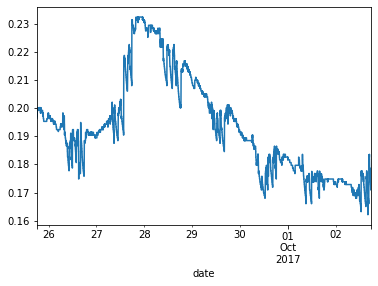

In [320]:
train_df.iloc[:,idx].plot()

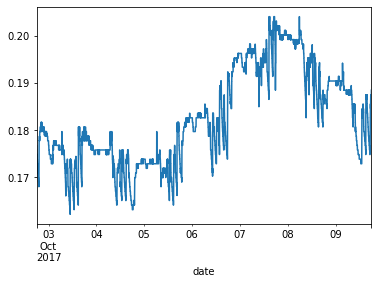

In [321]:
val_df.iloc[:,idx].plot()

In [43]:
train_df.describe().iloc[:,90:]

,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
count,60480.000000,60480.000000,60480.000000
mean,65.089128,63.025948,0.553366
std,1.148953,5.614273,0.442204
min,63.968940,57.270400,0.000000
25%,64.304995,60.483217,0.220000
50%,64.445100,61.695900,0.530000
75%,65.656203,63.562925,0.720000
max,69.141520,140.173600,2.260000


In [42]:
val_df.describe().iloc[:,90:]

,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
count,43200.000000,43200.000000,43200.000000
mean,65.184507,63.154395,0.543075
std,1.199681,5.469375,0.450358
min,64.017120,53.916260,0.000000
25%,64.297837,60.625120,0.180000
50%,64.454780,61.912890,0.540000
75%,66.079255,63.806302,0.716500
max,68.815500,140.356000,2.160000


In [9]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(train_df)
trans_df = scaler.transform(df)
norm_data = pd.DataFrame(data=trans_df, index=df.index, columns=df.columns, dtype=None, copy=None)

In [11]:
import joblib
joblib.dump(scaler, './dataset/WADI/preprocessing/WADI_standard_scaler.pkl')

['./dataset/WADI/preprocessing/WADI_standard_scaler.pkl']

In [119]:
scaler.var_

array([1.93381375e+02, 2.19500219e-02, 2.36757249e-03, 7.25037031e-01,
       1.44024944e+02, 1.98858208e-01, 0.00000000e+00, 0.00000000e+00,
       2.04572415e-01, 1.98557705e-01, 1.98557705e-01, 1.73592018e-01,
       0.00000000e+00, 1.61821322e+04, 1.36125498e+03, 2.01115939e-02,
       1.58329846e-02, 1.39270799e+03, 1.37799274e-02, 1.36417186e-02,
       1.47121608e+03, 1.36470661e-02, 1.47599292e-02, 1.42352367e+03,
       1.80713847e-02, 1.34263779e-02, 1.55655476e+03, 1.63513748e-02,
       1.62810669e-02, 1.50639380e+03, 1.46046225e-02, 1.62507859e-02,
       8.81556679e-01, 7.29964037e-02, 2.68081261e-01, 2.01194265e-02,
       1.37611991e-02, 1.36720656e-02, 1.80497518e-02, 1.63401933e-02,
       1.46080483e-02, 1.70262308e-03, 3.82129195e-03, 1.24120957e-03,
       2.85116739e-03, 3.22092112e-03, 2.77242555e-03, 1.59177510e-03,
       3.56628066e-03, 2.32486015e-03, 2.84238455e-03, 8.90439815e-03,
       2.90648338e-03, 3.64990786e-01, 1.68805645e+01, 0.00000000e+00,
      

In [120]:
norm_data.describe()

,1_AIT_001_PV,1_AIT_003_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,1_MV_004_STATUS,1_P_001_STATUS,...,2B_AIT_001_PV,2B_AIT_002_PV,2B_AIT_003_PV,3_AIT_001_PV,3_AIT_003_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
count,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.0,120960.0,120960.000000,120960.000000,...,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000
mean,0.040082,0.255643,-0.095678,-0.000595,-0.016366,-0.000511,0.0,0.0,-0.006368,-0.000718,...,0.029307,0.014870,0.199365,-0.020764,0.050756,0.024743,0.011058,0.008851,-0.010055,-0.000884
std,0.938386,1.153360,0.996985,0.999811,0.963351,0.999628,0.0,0.0,0.996908,0.999658,...,0.945740,0.968914,1.072740,0.927221,1.022890,0.959046,0.994038,0.991829,0.986352,1.004738
min,-7.552712,-47.320410,-2.002416,-0.615670,-4.756587,-2.848957,0.0,0.0,-2.834875,-0.615717,...,-1.573389,-3.829776,-15.980628,-0.145377,-1.400486,-3.497198,-1.984958,-0.990301,-1.830014,-1.232099
25%,-0.762766,-0.460828,-0.988829,-0.615425,-0.688854,-0.606479,0.0,0.0,-0.623937,-0.615717,...,-0.722041,-0.459945,-0.393075,-0.145377,-0.599857,-0.305188,0.136682,-0.704155,-0.466631,-0.738432
50%,-0.084775,0.496410,-0.135639,-0.615335,0.014423,-0.606479,0.0,0.0,-0.623937,-0.615717,...,-0.113918,0.027255,0.265795,-0.145377,-0.202238,0.408444,0.403237,-0.576492,-0.243892,-0.042810
75%,0.545036,0.830654,0.664878,1.580332,0.482917,1.635999,0.0,0.0,1.587000,1.628457,...,0.554980,0.500722,0.911132,-0.145377,0.498493,0.635829,0.593527,0.675717,0.105636,0.405979
max,3.395081,3.137151,2.379624,1.813695,3.590927,1.635999,0.0,0.0,1.587000,1.628457,...,2.804962,111.591520,2.683390,7.171294,5.022123,3.153381,2.008033,3.425839,13.917927,3.839209


In [17]:
norm_data.to_csv("./dataset/WADI/WADI_standard_normalised_normal_train7day.csv", mode='w')

In [5]:
import pandas as pd
norm_data = pd.read_csv("./dataset/WADI/WADI_standard_normalised_normal.csv")

In [6]:
norm_data.date = pd.to_datetime(norm_data.date)
norm_data = norm_data.set_index('date')

In [8]:
norm_attack_data = pd.read_csv("./dataset/WADI/WADI_Attack_standard_normalised_normal.csv")
norm_attack_data.date = pd.to_datetime(norm_attack_data.date)
norm_attack_data = norm_attack_data.set_index('date')

In [32]:
norm_data.columns[60:62]

Index(['2_MCV_501_CO', '2_MCV_601_CO'], dtype='object')

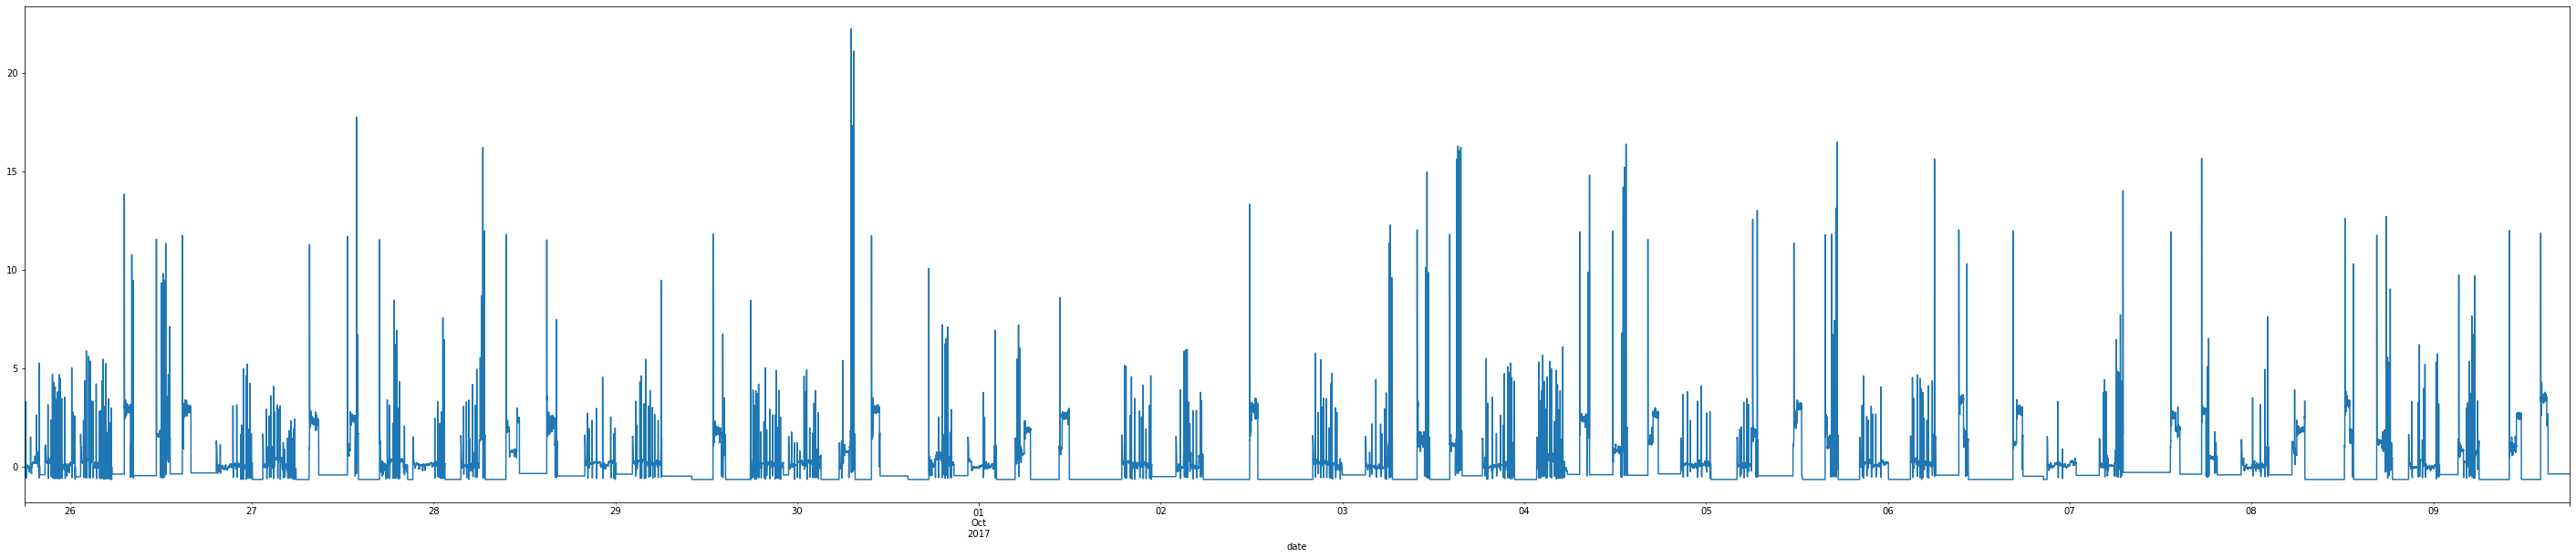

In [37]:
# 0 2 3 4 5 8 9 11 13 14 15 16 17 18
idx = 40
norm_data.iloc[:,idx].plot(figsize=(50,10))# .loc['2017-10-08 18:00:00':'2017-10-09 18:00:00',:].iloc[:,idx].plot(figsize=(50,10))

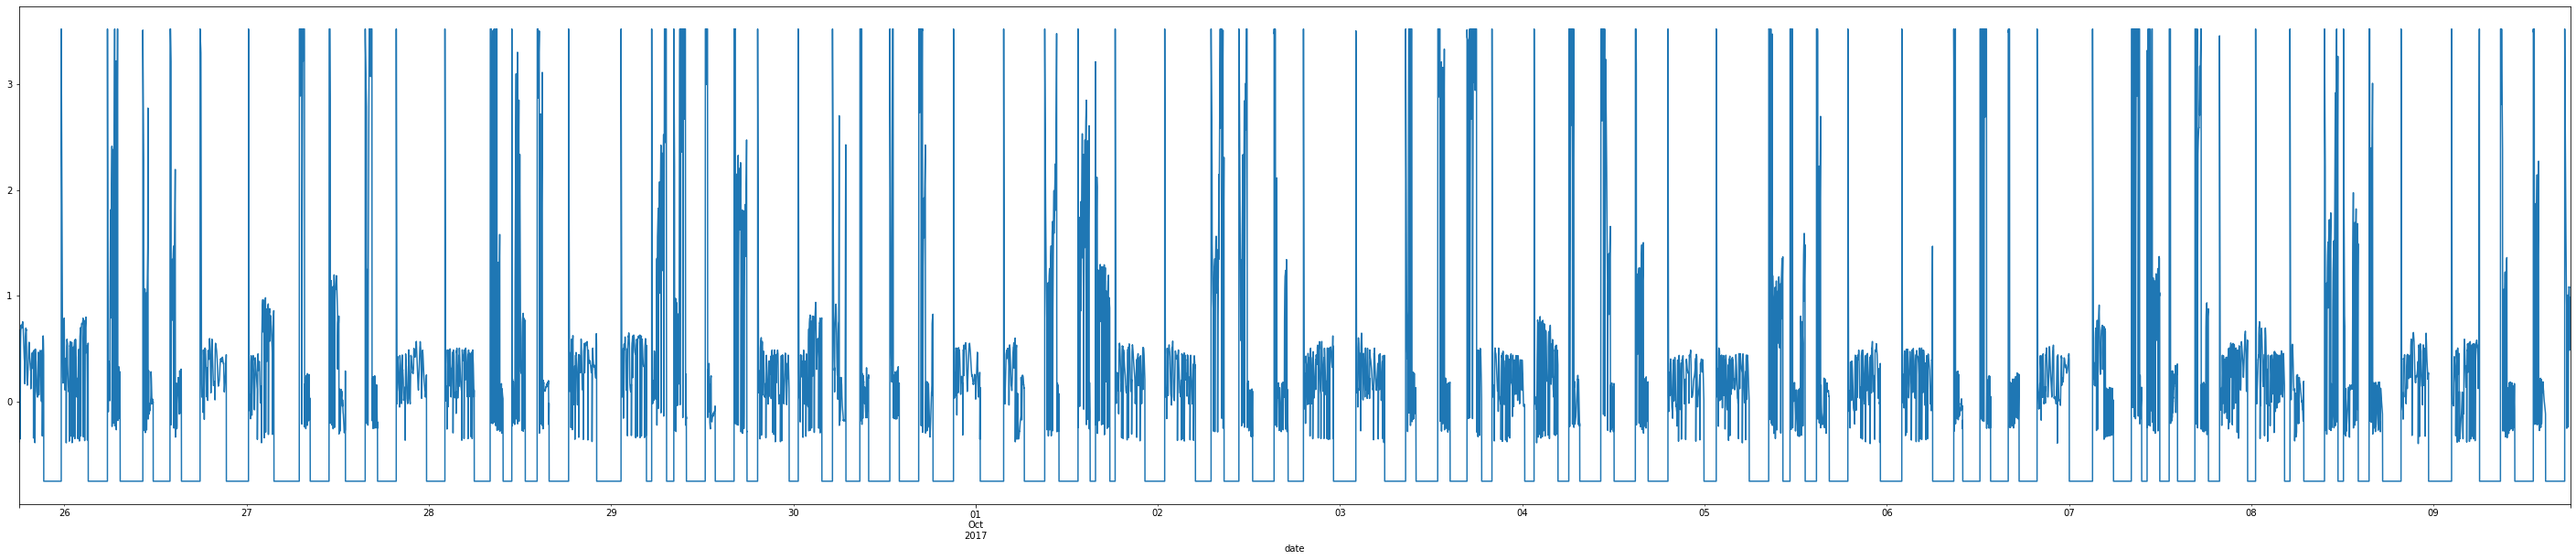

In [34]:
idx = 61
norm_data.iloc[:,idx].plot(figsize=(50,10))# .loc['2017-10-08 18:00:00':'2017-10-09 18:00:00',:].iloc[:,idx].plot(figsize=(50,10))

In [30]:
norm_data.iloc[:,[23]]

,2_FIC_401_CO
date,
2017-09-25 18:00:00,-1.281237
2017-09-25 18:00:10,-1.254754
2017-09-25 18:00:20,-1.211783
2017-09-25 18:00:30,-1.157720
2017-09-25 18:00:40,-1.105326
...,...
2017-10-09 17:59:10,-0.771001
2017-10-09 17:59:20,-0.832624
2017-10-09 17:59:30,-0.886745


In [7]:
norm_data.iloc[:,0:50].to_csv("./dataset/WADI/WADI_standard_normalised_normal_50.csv", mode='w')

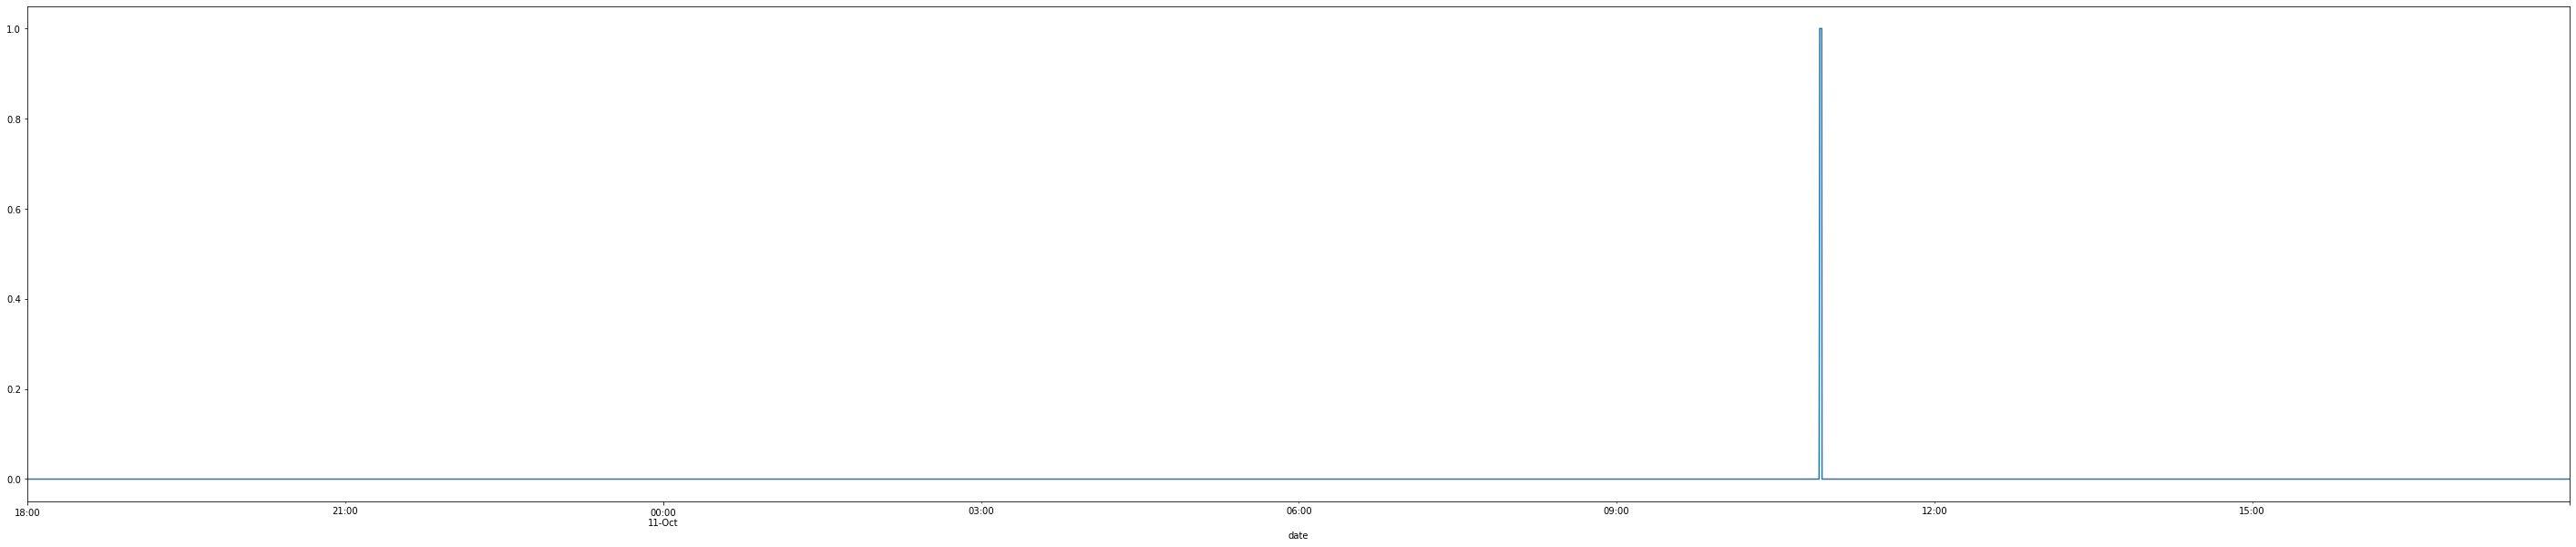

In [119]:
norm_attack_data.loc['2017-10-10 18:00:00':'2017-10-11 18:00:00',:].iloc[:,idx].plot(figsize=(50,10))

In [106]:
result = []
for i in range(93):
    for j in range(93):
        if i!=j:
            if np.sum(np.array(norm_data.iloc[:,i] != norm_data.iloc[:,j])) == 0:
                result.append([i,j])

In [107]:
result

[[6, 7],
 [6, 12],
 [6, 55],
 [6, 75],
 [7, 6],
 [7, 12],
 [7, 55],
 [7, 75],
 [9, 10],
 [10, 9],
 [12, 6],
 [12, 7],
 [12, 55],
 [12, 75],
 [55, 6],
 [55, 7],
 [55, 12],
 [55, 75],
 [75, 6],
 [75, 7],
 [75, 12],
 [75, 55]]

In [112]:
norm_attack_data.iloc[:,[6,7,9,10,12,55,75]].describe()

,1_MV_002_STATUS,1_MV_003_STATUS,1_P_001_STATUS,1_P_003_STATUS,1_P_006_STATUS,2_MCV_007_CO,2_PIC_003_SP
count,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000
mean,0.008316,0.008258,0.012626,0.012132,0.000486,0.629861,-0.000752
std,0.092222,0.092001,1.005587,1.005327,0.021726,7.238980,0.022740
min,-1.000000,-1.000000,-0.615717,-0.615717,0.000000,0.000000,-0.750000
25%,0.000000,0.000000,-0.615717,-0.615717,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-0.615717,-0.615717,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.628457,1.628457,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.628457,1.628457,1.000000,100.000000,0.000000


In [109]:
result_attack = []
for i in range(93):
    for j in range(93):
        if i!=j:
            if np.sum(np.array(norm_attack_data.iloc[:,i] != norm_attack_data.iloc[:,j])) == 0:
                result_attack.append([i,j])

In [110]:
result_attack

[]

## Anomaly test set 구성

## Experiments: Informer 시계열 예측 모형

In [1]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [2]:
###################################
# 여기를 보세요
###################################
args = dotdict()

args.model = 'informerstack' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'WADI' # data
args.root_path = './dataset/WADI/preprocessing/' # root path of data file
args.data_path = 'wadi.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = '2_FQ_601_PV' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 6*60*1 # input sequence length of Informer encoder
args.label_len = 6*30 # start token length of Informer decoder
args.pred_len = 6*10 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

# 얘네들은 feature 개수 의미하는건가?
args.enc_in = 101 # encoder input size
args.dec_in = 101 # decoder input size
args.c_out = 101 # output size

args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 16 # num of heads
#args.e_layers = 4 # 4 # num of encoder layers
args.s_layers = [4,3,2,1]
args.d_layers = 4 # 2 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = True # whether to output attention in ecoder
args.mix = True
args.padding = 0
#args.freq = 's'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 30
args.patience = 4
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'

In [4]:
Exp = Exp_Informer

for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}_informerstack_preprocessing2'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # validation
    print('>>>>>>>validation : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.validation(setting)

    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informerstack_WADI_ftM_sl360_ll180_pl60_dm512_nh16_elNone_dl4_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0_informerstack_preprocessing2>>>>>>>>>>>>>>>>>>>>>>>>>>
train 85981
val 17221
test 17221
	iters: 100, epoch: 1 | loss: 0.3553755
	speed: 0.3513s/iter; left time: 28271.1514s
	iters: 200, epoch: 1 | loss: 0.2700992
	speed: 0.3370s/iter; left time: 27087.7202s
	iters: 300, epoch: 1 | loss: 0.2461796
	speed: 0.3379s/iter; left time: 27130.8404s
	iters: 400, epoch: 1 | loss: 0.1957208
	speed: 0.3399s/iter; left time: 27255.1679s
	iters: 500, epoch: 1 | loss: 0.2559431
	speed: 0.3372s/iter; left time: 26999.7877s
	iters: 600, epoch: 1 | loss: 0.2020106
	speed: 0.3410s/iter; left time: 27273.3018s
	iters: 700, epoch: 1 | loss: 0.1629007
	speed: 0.3367s/iter; left time: 26898.5027s
	iters: 800, epoch: 1 | loss: 0.2056428
	speed: 0.3368s/iter; left time: 26867.3833s
	iters: 900, epoch: 1 | loss: 0.1988734
	speed: 0.3365s/iter; left time: 26811.8281s

## Anomaly detection

In [120]:
import numpy as np
path = './results/informerstack_WADI_ftM_sl60_ll30_pl6_dm512_nh24_elNone_dl4_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0_informerstack5'
val_preds = np.load(path+'/val_pred.npy')
val_trues = np.load(path+'/val_true.npy')
test_preds = np.load(path+'/test_pred.npy')
test_trues = np.load(path+'/test_true.npy')

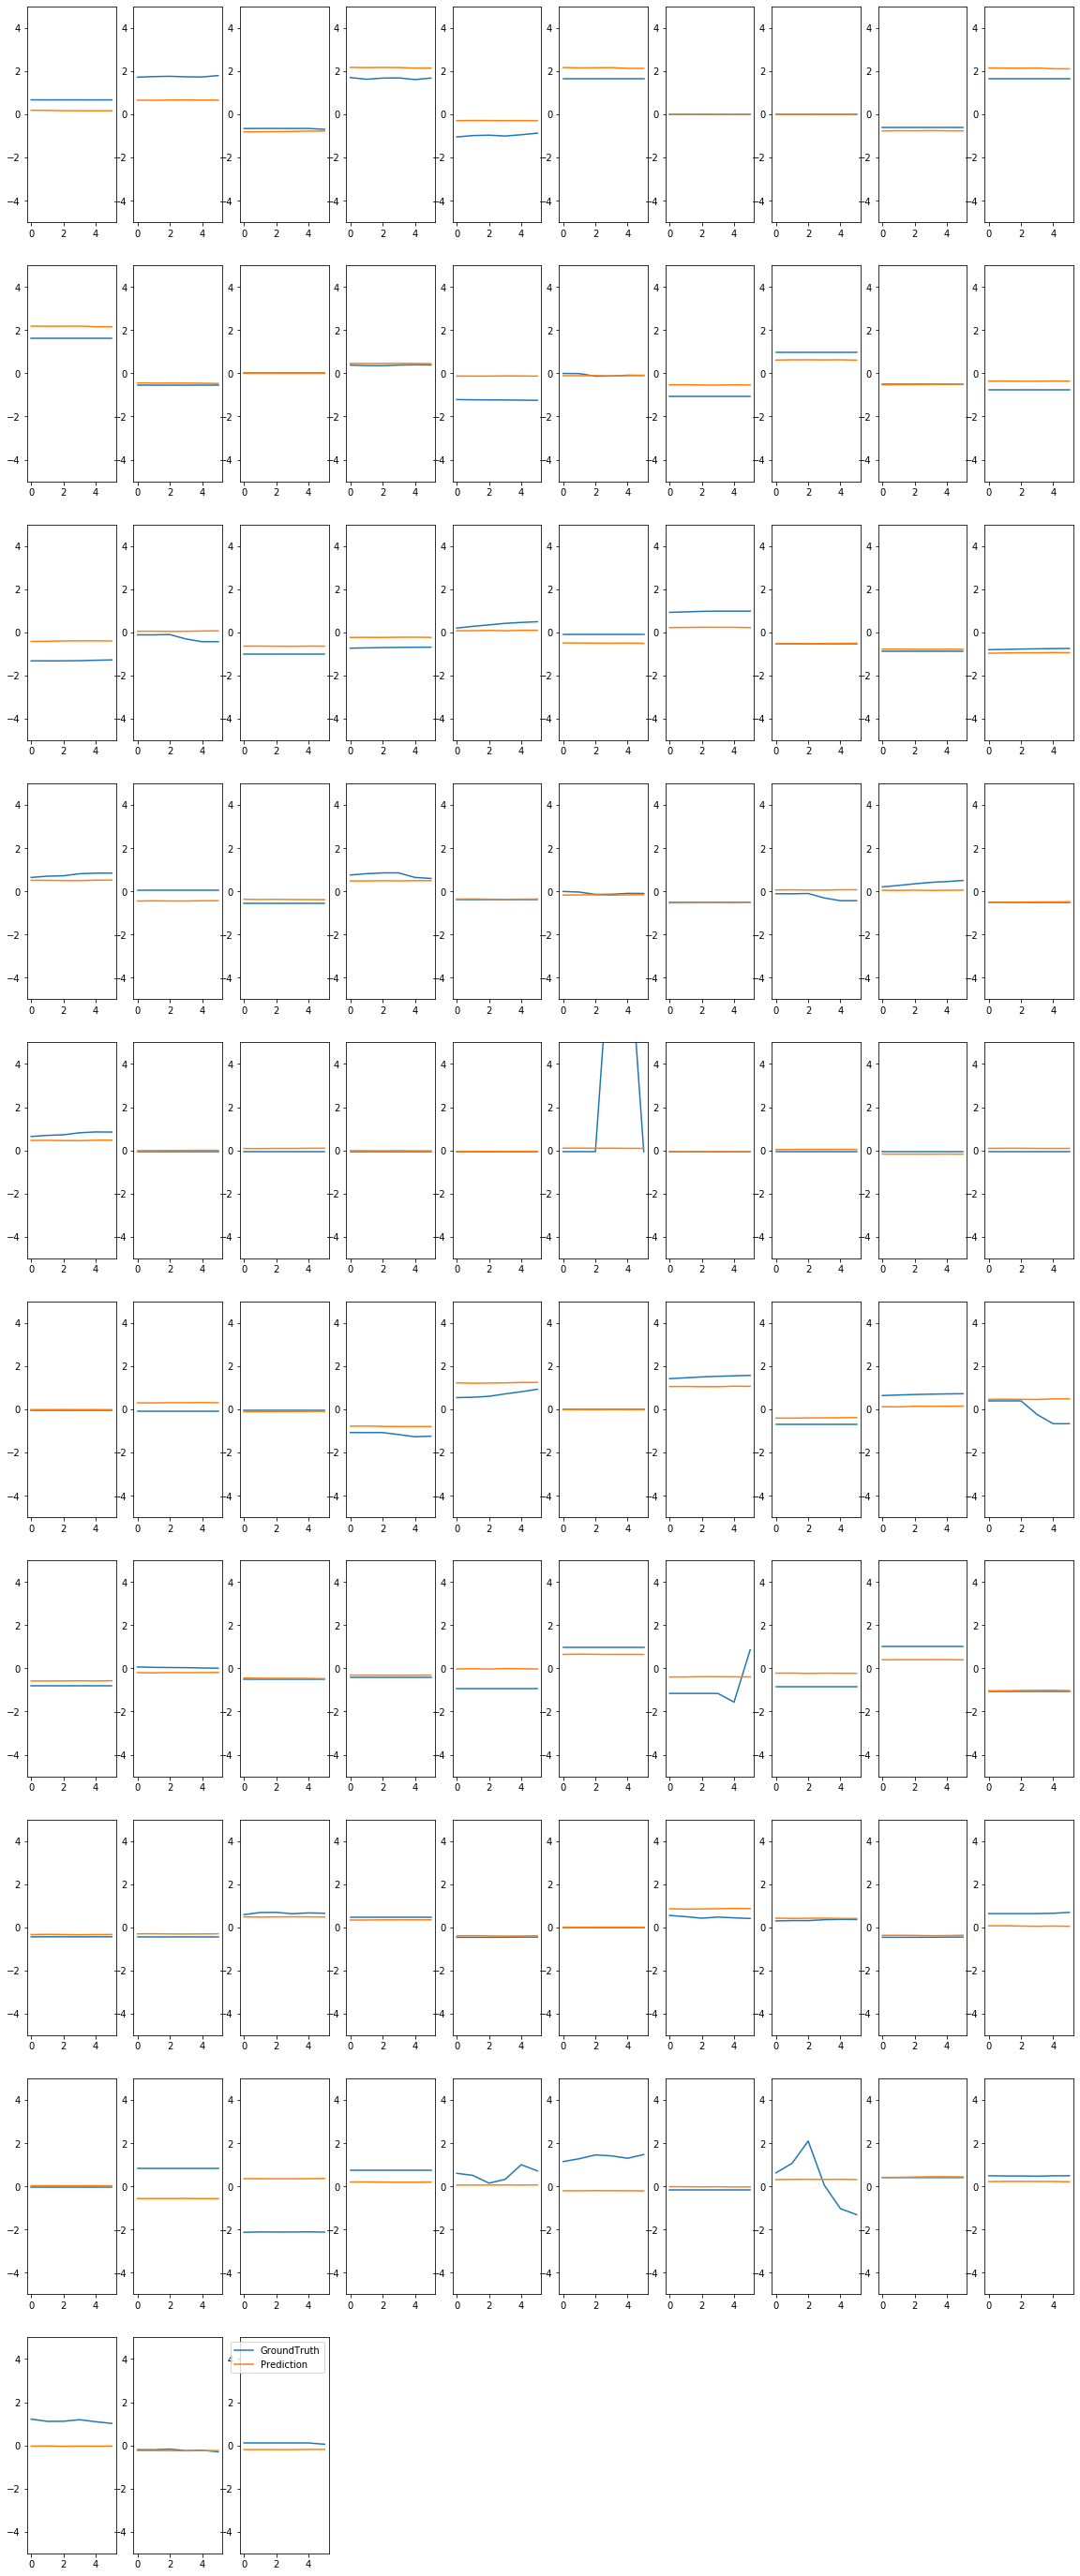

In [121]:
# StandardScaler
# lr=0.0001
# args.seq_len = 6*60*3, args.label_len = 6*60, args.pred_len = 6*30 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))

idx = 2880
 
for i in range(args.enc_in):
    plt.subplot(10, 10, i+1)
    plt.ylim([-5.0, 5.0])    
    plt.plot(val_trues[idx,:,i], label='GroundTruth')
    plt.plot(val_preds[idx,:,i], label='Prediction')


plt.legend()
plt.show()